In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)
        if file_dir == '/kaggle/input/data5g/Theme5/data/clean_data.csv':
            print(f"Skipped {file_dir}")
            continue
        files.append(file_dir)
        print(f"{os.path.join(dirname, filename)} added to files array")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data5g/Theme5/data/2022-07-08-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-07-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-21-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo06-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-15-garbo08-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-20-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-08-garbo10-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-22-garbo01-combined-kml.csv added to files array
Skipped /kaggle/input/data5g/Theme5/data/clean_data.csv
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo11-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-12-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-06-

In [2]:
print(len(files))

136


In [3]:
#Data Ingestion & Cleaning
#Filter out Invalid GPS Points & Parse timestamps
import warnings
warnings.filterwarnings('ignore') #remove warnings

cleaned_dataframes = []

for file in files:
    data5G = pd.read_csv(file) #Read csv file 
    #GPS Points 
    data5G = data5G[
    (data5G['latitude'].between(-90, 90)) &
    (data5G['longitude'].between(-180, 180)) &
    (data5G['latitude'] != 99999) &
    (data5G['longitude'] != 99999)
    ]  
    #Parse timestamps 
    data5G['time'] = pd.to_datetime(data5G['time'], unit='s', errors='coerce') #Removes invalid values (abc) and converts numeric values into time and date
    data5G = data5G.dropna(subset=['time']) #Removes rows with invalid timestamps

    cleaned_dataframes.append(data5G)

master_data5G = pd.concat(cleaned_dataframes, ignore_index=True)

master_data5G.to_csv('/kaggle/working/master_data5G.csv', index=False) #Convert to a master csv 

print("Data cleaning completed and saved as'master_data5G.csv'")

Data cleaning completed and saved as'master_data5G.csv'


In [4]:
#Data Pre-Processing
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/working/master_data5G.csv', low_memory=False) #Read new CSV created


df.head() #Show the first 5 rows

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
0,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
1,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
2,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
3,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
4,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768


In [5]:
# Data structure & types
df.info()

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493820 entries, 0 to 2493819
Data columns (total 32 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   Day               object 
 2   Year              float64
 3   Month             float64
 4   Date              float64
 5   hour              float64
 6   min               float64
 7   sec               float64
 8   timezone          object 
 9   latitude          float64
 10  longitude         float64
 11  speed             float64
 12  truck             object 
 13  svr1              float64
 14  svr2              float64
 15  svr3              float64
 16  svr4              float64
 17  Role              object 
 18  Transfer size     float64
 19  Transfer unit     object 
 20  Bitrate           float64
 21  bitrate_unit      object 
 22  Retransmissions   object 
 23  CWnd              object 
 24  cwnd_unit         object 
 25  Role-RX           object 
 26  Transfer size-

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
count,2493820,2493820,2493820.0,2493820.0,2.493820e+06,2.493820e+06,2.493820e+06,2.493820e+06,2493820,2.493820e+06,...,2415256,2415254,2416777,2416752,2.416751e+06,2416753,2.416751e+06,2416753,2.263310e+06,2481677
unique,469342,5,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,695,695,1,3,NaN,1,NaN,1,NaN,298
top,2022-07-04 01:16:51,Mon,NaN,NaN,NaN,NaN,NaN,NaN,AEST,NaN,...,0.0,0.01025390625,MBytes,RX-C,NaN,MBytes,NaN,Mbits/sec,NaN,square_111669149768
freq,28,546142,NaN,NaN,NaN,NaN,NaN,NaN,2493820,NaN,...,1744567,899601,2416777,2415229,NaN,2416753,NaN,2416753,NaN,82225
mean,NaN,NaN,2022.0,7.0,1.219823e+01,8.831085e+00,2.942074e+01,2.949162e+01,NaN,-3.775414e+01,...,NaN,NaN,NaN,NaN,1.971077e+00,NaN,1.653276e+01,NaN,3.077501e-01,NaN
std,NaN,NaN,0.0,0.0,6.012849e+00,2.218901e+00,1.750480e+01,1.731369e+01,NaN,3.392902e-02,...,NaN,NaN,NaN,NaN,1.914520e+00,NaN,1.594400e+01,NaN,9.148516e-01,NaN
min,NaN,NaN,2022.0,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.782882e+01,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,2022.0,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,NaN,-3.778264e+01,...,NaN,NaN,NaN,NaN,7.382812e-01,NaN,6.190000e+00,NaN,0.000000e+00,NaN
50%,NaN,NaN,2022.0,7.0,1.200000e+01,9.000000e+00,2.900000e+01,2.900000e+01,NaN,-3.775611e+01,...,NaN,NaN,NaN,NaN,1.460000e+00,NaN,1.220000e+01,NaN,6.358099e-02,NaN
75%,NaN,NaN,2022.0,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,NaN,-3.772892e+01,...,NaN,NaN,NaN,NaN,2.870000e+00,NaN,2.410000e+01,NaN,2.814837e-01,NaN


time                     0
Day                      0
Year                     0
Month                    0
Date                     0
hour                     0
min                      0
sec                      0
timezone                 0
latitude                 0
longitude                0
speed                    1
truck                    3
svr1                336023
svr2                336023
svr3                336023
svr4                336024
Role                 77043
Transfer size        77044
Transfer unit        77043
Bitrate              77044
bitrate_unit         77043
Retransmissions      78564
CWnd                 78566
cwnd_unit            77043
Role-RX              77068
Transfer size-RX     77069
Transfer unit-RX     77067
Bitrate-RX           77069
bitrate_unit-RX      77067
send_data           230510
square_id            12143
dtype: int64


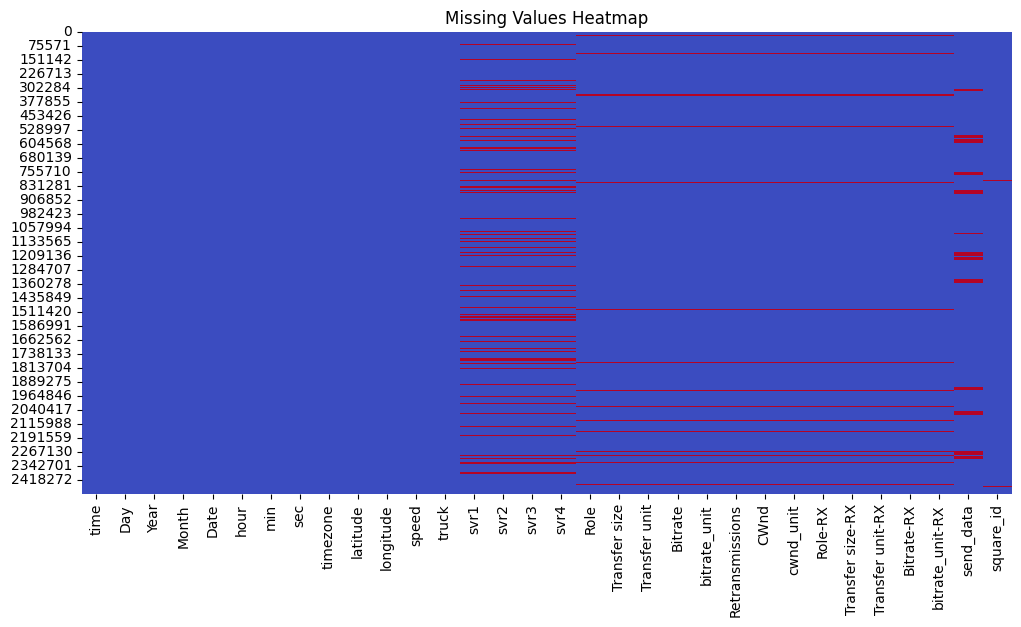

In [6]:
#Total missing values per column
print(df.isnull().sum())

#Visual heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm") #Red = Missing, Blue = Present
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
#Missing-Value Strategy 
#Check missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#Drop columns with >60% missing values
threshold = 60
drop_cols = missing_percent[missing_percent > threshold].index
df = df.drop(columns=drop_cols)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/working/master_data5G.csv')  


numeric_df = df.select_dtypes(include=['number'])

#Define function for removing outliers using IQR
def remove_outliers_iqr(df, columns):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outliers as data points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    df_cleaned = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
    
    return df_cleaned

#Outlier removal 
df_cleaned = remove_outliers_iqr(numeric_df, numeric_df.columns)

#Check shape before and after cleaning
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

#commented representation out due to memory issues

# Pairplot for multivariate analysis
#sns.pairplot(df_cleaned, diag_kind='kde', corner=True)

#Correlation matrix
corr = abs(df_cleaned.corr())

#Lower triangle mask
lower_triangle = np.tril(corr, k=-1)
mask = lower_triangle == 0

#Heatmap 
'''plt.figure(figsize=(12, 10))
sns.heatmap(lower_triangle, center=0.5, cmap='coolwarm', annot=True,
            xticklabels=corr.index, yticklabels=corr.columns,
            cbar=True, linewidths=1, mask=mask)
plt.title('Lower Triangle of Correlation Matrix')
plt.show() '''

Shape before removing outliers: (2493820, 32)
Shape after removing outliers: (2493820, 18)


"plt.figure(figsize=(12, 10))\nsns.heatmap(lower_triangle, center=0.5, cmap='coolwarm', annot=True,\n            xticklabels=corr.index, yticklabels=corr.columns,\n            cbar=True, linewidths=1, mask=mask)\nplt.title('Lower Triangle of Correlation Matrix')\nplt.show() "

In [9]:
#Time series
#Analysing the data
master_data = pd.read_csv('/kaggle/working/master_data5G.csv')

print(master_data.head())
print(master_data.dtypes)

                  time  Day    Year  Month  Date  hour   min  sec timezone  \
0  2022-07-07 19:36:08  Fri  2022.0    7.0   8.0   5.0  36.0  8.0     AEST   
1  2022-07-07 19:36:08  Fri  2022.0    7.0   8.0   5.0  36.0  8.0     AEST   
2  2022-07-07 19:36:08  Fri  2022.0    7.0   8.0   5.0  36.0  8.0     AEST   
3  2022-07-07 19:36:08  Fri  2022.0    7.0   8.0   5.0  36.0  8.0     AEST   
4  2022-07-07 19:36:08  Fri  2022.0    7.0   8.0   5.0  36.0  8.0     AEST   

    latitude  ...  Retransmissions  CWnd cwnd_unit  Role-RX  Transfer size-RX  \
0 -37.712508  ...              NaN   NaN       NaN      NaN               NaN   
1 -37.712508  ...              NaN   NaN       NaN      NaN               NaN   
2 -37.712508  ...              NaN   NaN       NaN      NaN               NaN   
3 -37.712508  ...              NaN   NaN       NaN      NaN               NaN   
4 -37.712508  ...              NaN   NaN       NaN      NaN               NaN   

   Transfer unit-RX  Bitrate-RX bitrate_unit

In [11]:
#One column for date and time
#renamed columns to support conversion
df.rename(columns={
    'Year': 'year',
    'Month': 'month',
    'Date': 'day',
    'hour': 'hour',
    'min': 'minute',
    'sec': 'second'
}, inplace=True)

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.sort_values('datetime')


In [31]:
#average of svr1-4
df['svr_avg'] = df[['svr1', 'svr2', 'svr3', 'svr4']].mean(axis=1)


In [37]:
print(df.columns.tolist())

['time', 'Day', 'Year', 'Month', 'Date', 'hour', 'min', 'sec', 'timezone', 'latitude', 'longitude', 'speed', 'truck', 'svr1', 'svr2', 'svr3', 'svr4', 'Role', 'Transfer size', 'Transfer unit', 'Bitrate', 'bitrate_unit', 'Retransmissions', 'CWnd', 'cwnd_unit', 'Role-RX', 'Transfer size-RX', 'Transfer unit-RX', 'Bitrate-RX', 'bitrate_unit-RX', 'send_data', 'square_id', 'svr_avg']


In [38]:
from sklearn.preprocessing import MinMaxScaler
import joblib

target_column = 'Bitrate'
feature_columns = ['latitude', 'longitude', 'speed', 'hour', 'svr_avg']


df_features = df[feature_columns + [target_column]].dropna()


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_features.drop(columns=[target_column]))
y_scaled = scaler_y.fit_transform(df_features[[target_column]])

joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")


['scaler_y.pkl']

In [39]:
def create_dataset(X, y, lookback=50):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback=50)


#Train/test split
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


In [40]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

#Baseline models

y_test_flat = y_test.flatten()

#naive forecast
naive_preds = y_test_flat[:-1]
naive_actual = y_test_flat[1:]
naive_rmse = np.sqrt(mean_squared_error(naive_actual, naive_preds))
naive_mae = mean_absolute_error(naive_actual, naive_preds)
print(f"Naive, RMSE: {naive_rmse:.4f}, MAE: {naive_mae:.4f}")

Naive, RMSE: 0.0767, MAE: 0.0457


In [41]:
#Moving average forecast
window = 5
rolling_preds = np.convolve(y_test_flat, np.ones(window)/window, mode='valid')
rolling_actual = y_test_flat[window-1:]
rolling_rmse = np.sqrt(mean_squared_error(rolling_actual, rolling_preds))
rolling_mae = mean_absolute_error(rolling_actual, rolling_preds)
print(f"Moving Average (window={window}), RMSE: {rolling_rmse:.4f}, MAE: {rolling_mae:.4f}")

Moving Average (window=5), RMSE: 0.0479, MAE: 0.0327


In [42]:
#results for csv
baseline_results = [
    {'model': 'Naive','lookback': None,'hidden_size': None,'num_layers': None,'rmse': naive_rmse,'mae': naive_mae},
    {'model': f'MovingAverage_window_5','lookback': None,'hidden_size': None,'num_layers': None,'rmse': rolling_rmse,'mae': rolling_mae}
]

In [43]:
#LSTM Model
#define model 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
#LSTM Model
#create dataset with lookback
lookback = 50
X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback=lookback)
train_size = int(len(X_seq) * 0.8)

X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                           torch.tensor(y_train, dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                          torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=512, shuffle=False)

#initialise model
model = LSTMModel(input_size=X_train.shape[2], hidden_size=64, num_layers=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [45]:
#LSTM Model
#Train model
for epoch in range(5):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 21.2600
Epoch 2, Loss: 20.7456
Epoch 3, Loss: 20.6098
Epoch 4, Loss: 20.4248
Epoch 5, Loss: 20.2598


In [46]:
#LSTM Model
#Evaluate
#broke predictions into batches to fix out of memory
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model.eval()
y_pred_batches = []

with torch.no_grad():
    for xb in test_loader:
        xb = xb[0].to(device)
        preds = model(xb).cpu().numpy()
        y_pred_batches.append(preds)

#combine all batches
y_pred = np.vstack(y_pred_batches)

y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
mae = mean_absolute_error(y_test_inv, y_pred_inv)


print(f"LSTM, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

LSTM, RMSE: 7.18, MAE: 5.35


In [47]:
#LSTM results csv 
lstm_result = {'model': 'LSTM','lookback': 50,'hidden_size': 64,'num_layers': 1,'rmse': rmse,'mae': mae}

In [48]:
#Hyperparameter tuning of the LSTM model

tuning_results = []

#parameters
lookback_options = [30, 50]
hidden_sizes = [32, 64]
num_layers_list = [1, 2]
learning_rates = [0.001, 0.0005]


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#loop for hyperparameter tuning
for lookback in lookback_options:
    X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback)
    train_size = int(len(X_seq) * 0.8)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]

    for hidden_size in hidden_sizes:
        for num_layers in num_layers_list:
            for lr in learning_rates:
                print(f"\nTraining: lookback={lookback}, hidden={hidden_size}, layers={num_layers}, lr={lr}")

                #initialise 
                train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                         torch.tensor(y_train, dtype=torch.float32))
                train_loader = DataLoader(train_ds, batch_size=512, shuffle=False)

            
                model = LSTMModel(input_size=X_train.shape[2],
                                  hidden_size=hidden_size,
                                  num_layers=num_layers).to(device)

                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                criterion = nn.MSELoss()

                #train
                for epoch in range(5):
                    model.train()
                    epoch_loss = 0
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        pred = model(xb)
                        loss = criterion(pred, yb)
                        loss.backward()
                        optimizer.step()
                        epoch_loss += loss.item()

                    print(f"  Epoch {epoch+1} Loss: {epoch_loss:.4f}")

                #evaluate
                model.eval()
                test_loader = DataLoader(TensorDataset(torch.tensor(X_test, dtype=torch.float32)), batch_size=512)
                y_pred_batches = []
                with torch.no_grad():
                    for xb in test_loader:
                        xb = xb[0].to(device)
                        pred = model(xb).cpu().numpy()
                        y_pred_batches.append(pred)
                y_pred = np.vstack(y_pred_batches)

                y_pred_inv = scaler_y.inverse_transform(y_pred)
                y_test_inv = scaler_y.inverse_transform(y_test)

                rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
                mae = mean_absolute_error(y_test_inv, y_pred_inv)

                
                tuning_results.append({'lookback': lookback,'hidden_size': hidden_size,'num_layers': num_layers, 'lr': lr, 'rmse': rmse, 'mae': mae})

                print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

results_df = pd.DataFrame(tuning_results)
results_df = results_df.sort_values('rmse')

print("Best combinations:")
display(results_df.head())


Training: lookback=30, hidden=32, layers=1, lr=0.001
  Epoch 1 Loss: 21.7644
  Epoch 2 Loss: 20.6906
  Epoch 3 Loss: 20.5784
  Epoch 4 Loss: 20.5268
  Epoch 5 Loss: 20.4712
RMSE: 7.20, MAE: 5.27

Training: lookback=30, hidden=32, layers=1, lr=0.0005
  Epoch 1 Loss: 21.2773
  Epoch 2 Loss: 20.7411
  Epoch 3 Loss: 20.6367
  Epoch 4 Loss: 20.5947
  Epoch 5 Loss: 20.5685
RMSE: 7.22, MAE: 5.30

Training: lookback=30, hidden=32, layers=2, lr=0.001
  Epoch 1 Loss: 21.7579
  Epoch 2 Loss: 20.4444
  Epoch 3 Loss: 20.2754
  Epoch 4 Loss: 20.0145
  Epoch 5 Loss: 19.8032
RMSE: 7.14, MAE: 5.25

Training: lookback=30, hidden=32, layers=2, lr=0.0005
  Epoch 1 Loss: 22.2428
  Epoch 2 Loss: 20.7690
  Epoch 3 Loss: 20.5043
  Epoch 4 Loss: 20.3554
  Epoch 5 Loss: 20.2478
RMSE: 7.16, MAE: 5.31

Training: lookback=30, hidden=64, layers=1, lr=0.001
  Epoch 1 Loss: 21.4699
  Epoch 2 Loss: 20.7396
  Epoch 3 Loss: 20.6251
  Epoch 4 Loss: 20.6006
  Epoch 5 Loss: 20.5273
RMSE: 7.20, MAE: 5.27

Training: lookbac

,lookback,hidden_size,num_layers,lr,rmse,mae
14,50,64,2,0.0010,7.124420,5.376775
10,50,32,2,0.0010,7.127630,5.250237
7,30,64,2,0.0005,7.139957,5.267523
2,30,32,2,0.0010,7.140905,5.253578
11,50,32,2,0.0005,7.141553,5.292718


In [49]:
for entry in tuning_results:
    entry['model'] = 'Tuned_LSTM'

In [51]:
#best model from hyperparameter tuning
best_lookback = 50
X_seq, y_seq = create_dataset(X_scaled, y_scaled, lookback=best_lookback)

train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        return self.fc(out[:, -1, :])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=X_train.shape[2]).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                        torch.tensor(y_train, dtype=torch.float32)),
                          batch_size=512, shuffle=False)

for epoch in range(100):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model.eval()
y_pred_batches = []

with torch.no_grad():
    for xb in test_loader:
        xb = xb[0].to(device)
        preds = model(xb).cpu().numpy()
        y_pred_batches.append(preds)

#combine all batches
y_pred = np.vstack(y_pred_batches)

y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

best_lstm_rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
best_lstm_mae = mean_absolute_error(y_test_inv, y_pred_inv)


print(f"LSTM, RMSE: {rmse:.4f}, MAE: {mae:.4f}")



#save model
torch.save(model.state_dict(), "best_lstm_model.pt")

Epoch 1, Loss: 21.3669
Epoch 2, Loss: 20.8314
Epoch 3, Loss: 20.5701
Epoch 4, Loss: 19.9212
Epoch 5, Loss: 19.6501
Epoch 6, Loss: 19.5546
Epoch 7, Loss: 19.5210
Epoch 8, Loss: 19.1949
Epoch 9, Loss: 19.1141
Epoch 10, Loss: 18.8950
Epoch 11, Loss: 18.6674
Epoch 12, Loss: 18.4777
Epoch 13, Loss: 18.5444
Epoch 14, Loss: 18.2257
Epoch 15, Loss: 18.2397
Epoch 16, Loss: 18.1559
Epoch 17, Loss: 18.0676
Epoch 18, Loss: 18.0184
Epoch 19, Loss: 17.9617
Epoch 20, Loss: 17.9501
Epoch 21, Loss: 18.0080
Epoch 22, Loss: 17.9989
Epoch 23, Loss: 17.9049
Epoch 24, Loss: 17.8051
Epoch 25, Loss: 17.8111
Epoch 26, Loss: 17.7368
Epoch 27, Loss: 17.6974
Epoch 28, Loss: 17.9573
Epoch 29, Loss: 17.6654
Epoch 30, Loss: 17.5745
Epoch 31, Loss: 17.5640
Epoch 32, Loss: 18.0057
Epoch 33, Loss: 17.6579
Epoch 34, Loss: 17.6470
Epoch 35, Loss: 17.4467
Epoch 36, Loss: 17.4110
Epoch 37, Loss: 17.3322
Epoch 38, Loss: 17.3639
Epoch 39, Loss: 18.8398
Epoch 40, Loss: 18.2745
Epoch 41, Loss: 17.6377
Epoch 42, Loss: 17.3944
E

In [52]:
best_lstm_result = {'model': 'Best_LSTM1','lookback': 50,'hidden_size': 64,'num_layers': 2, 'lr': 0.001, 'rmse': best_lstm_rmse,'mae': best_lstm_mae}

In [53]:
import pandas as pd


all_results = baseline_results + [lstm_result] + tuning_results + [best_lstm_result]

results_df = pd.DataFrame(all_results)


results_df.to_csv("model_comparison.csv", index=False)
print("Saved to model_comparison.csv")

Saved to model_comparison.csv
